In [4]:
import os
import zipfile

local_zip = 'rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/temp/')
zip_ref.close()

local_zip = 'rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/temp/')
zip_ref.close()

In [7]:
rock_dir = os.path.join('/temp/rps/rock')
paper_dir = os.path.join('/temp/rps/paper')
scissors_dir = os.path.join('/temp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

total training rock images: 840
total training paper images: 840
total training scissors images: 840


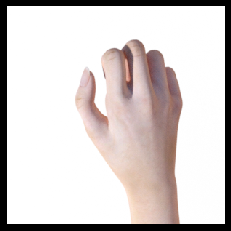

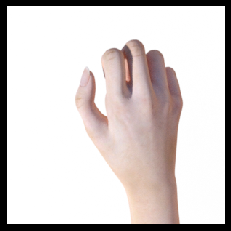

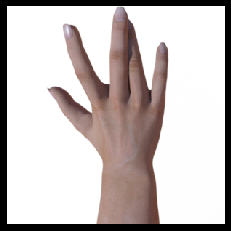

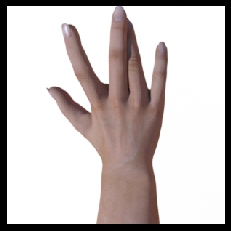

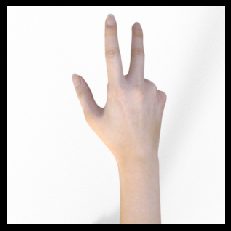

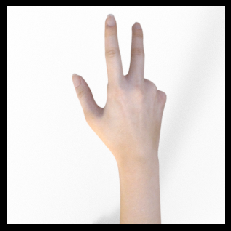

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('dark_background')

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [15]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/temp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/temp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                       target_size=(150,150),
                                                       class_mode='categorical',
                                                       batch_size=126)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              target_size=(150,150),
                                                              class_mode='categorical',
                                                              batch_size=126)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


#model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, 
                    epochs=13, 
                    steps_per_epoch=20, 
                    validation_data = validation_generator, 
                    verbose = 1, 
                    validation_steps=3)

model.save("rps.h5")

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 20 steps, validate for 3 steps
Epoch 1/13
20/20 [==============================] - 183s 9s/step - loss: 1.3566 - accuracy: 0.3476 - val_loss: 1.0930 - val_accuracy: 0.5349
Epoch 2/13
20/20 [==============================] - 140s 7s/step - loss: 1.0958 - accuracy: 0.3944 - val_loss: 1.0357 - val_accuracy: 0.4624
Epoch 3/13
20/20 [==============================] - 139s 7s/step - loss: 1.0189 - accuracy: 0.4833 - val_loss: 0.6750 - val_accuracy: 0.7070
Epoch 4/13
20/20 [==============================] - 138s 7s/step - loss: 0.8592 - accuracy: 0.5778 - val_loss: 0.4510 - val_accuracy: 0.8575
Epoch 5/13
20/20 [==============================] - 138s 7s/step - loss: 0.8382 - accuracy: 0.6437 - val_loss: 0.6049 - val_accuracy: 0.8683
Epoch 6/13
20/20 [==============================] - 139s 7s/step - loss: 0.6153 - accuracy: 0.7286 - val_loss: 0.1792 - v

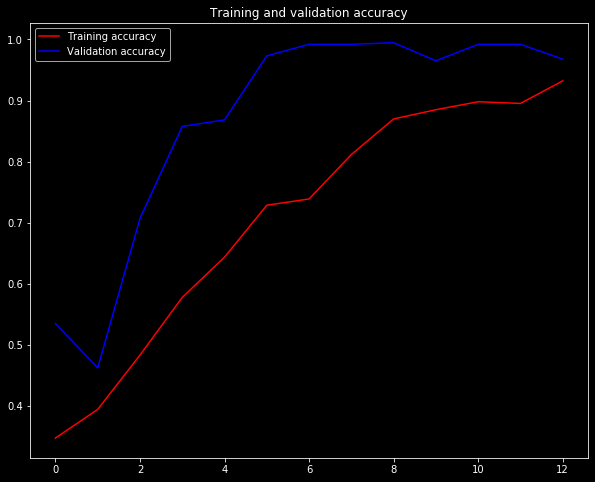

<Figure size 432x288 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(10,8))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()